In [2]:
library('ggplot2')
library('gridExtra')
library(RColorBrewer)
library(grid)
library(reshape2)
library(scales)
library(fitdistrplus)
library(actuar)
require('randomForest')

## Set directories, inc working dir

In [3]:
projectdir="../"
setwd(projectdir)
paperfigdir="figures"
supfigdir="figures/supfigures"

In [4]:
getwd()

[1] "/Users/tballing/Documents/Research/DSB_model/supplementary_files"

## Plotting Functions

In [5]:
add_corner_label <- function(p, letter){
    newp <- arrangeGrob(p, top=textGrob(toupper(letter), x=unit(0, "npc"), y=unit(1, "npc"), just=c("left", "top")))
    return(newp)
}

make_into_stars<-function(x){
    s=""
    if (x <= 0.05){s="*"}
    if (x <= 0.01){s="**"}
    if (x <= 0.001){s="***"}
    if (x <= 0.0001){s="****"}
    return(s)
}

################################################
# For changing the labels of the ENCODE features, etc. 
# to make them pretty for the plots. 
fixlabels <- function(fnames){
	x=sub("wgEncode", "", fnames)
	x = sub("Nhek", "", x )
    x = sub("Helas3", "", x )
    x = sub("Mcf7", "", x)
    x = sub("K562", "", x)
    x= sub("Pol2Sig", "Pol2b", x)
	x= sub("Broad", "", x)
	x = sub("StdSig", "", x)
	x= sub("SignalRep1", "", x)
	x = sub("Sig", "", x)
	x = sub("Uw", "", x)
    x = sub("Ucd", "", x)
	x= sub("RawRep2", "", x)
	x = sub("StdRawRep1", "", x)
    x = sub("OpenChromChip", "", x)
	x = sub("RegTxnCaltechRnaSeqR2x75Il200Pooled.bw", "RNA-Seq", x)
    x = sub("RegTxnCaltechRnaSeqR2x75Il200Pooled", "RNA-Seq", x)
    x = sub("CaltechRnaSeqR2x75Il200Rep1V2", "RNA-Seq", x)
	x= sub("GSE63525_NHEK_HiCCUPS_looplist", "HiC Loops", x)
    x = sub("GSE63874_Na_PDS_12_both", "G-quadruplex", x)
    x= sub("GSE63525_NHEK_combined.eigens", "HiC Eigenvectors", x)
    x= sub("GSE63525__combined.eigens", "HiC Eigenvectors", x)
    x= sub("Histone", "", x)
    x= sub("Tfbs", "Tfbs ", x)
    x= sub("Sydh", "", x)
    x =sub("H3k09me3", "H3K9me3", x)
    x = sub("me3b", "me3", x)
    x= sub("H3k", "H3K", x)
    x=sub("H2az", "H2A.Z", x)
    x = sub(".bigwig", "", x)
    x= sub(".bigWig", "", x)
    x=sub("RepliSeqSum", "Replication Seq", x)
    x=sub("Ctcf", "CTCF", x)
    x=sub("Ezh239875", "EZH2", x)
    x=sub("hg19.cage_peak_phase1and2combined_coord.merge", "Cage Peaks", x)
    return(x)
}

# Scatter plots comparing DSB datasets

## plotting function

In [6]:
my_scatter_plot <- function(x, y, myxlim=NULL, myylim=NULL, quantile=FALSE, myxlab="x values", myylab="y values"){
    df <- data.frame(x=x, y=y)
    #df <- data.frame(x=x, y=y, d=densCols(x,y))
    if (quantile){
        myylim=quantile(df$y, c(0.01, .99))
        myxlim=quantile(df$x, c(0.01, .99))
    }
    p=cor.test(df$x, df$y)
    if (p$p.value == 0){
        mytext=paste(" Pearson's cor: ", round(p$estimate, digits=4), sep="")
    } else {
        mytext=paste(" Pearson's cor: ", round(p$estimate, digits=4), "\n p-value: ", round(p$p.value, digits=4), sep="")}
    # ggMarginal is being weird with using scale_x_continuous, so need to filter the data with the x and y limits 
    myi = df$x<=myxlim[2] & df$x >= myxlim[1] & df$y <= myylim[2] & df$y >= myylim[1]
    p1 <- ggplot(df[myi,], aes(x,y)) + geom_point(size=.1, alpha=0.1) + 
        xlab(paste0(myxlab, "\n\n")) + ylab(paste0("\n\n", myylab)) +
        annotate("text", x=-Inf, y=Inf, label=mytext, vjust=1.1, hjust=0, size=3) + 
        theme(axis.text=element_text(size=8), text=element_text(size=9), 
              plot.title=element_text(size=1))
        #stat_density2d(aes(fill=..level..), geom="polygon")+ scale_fill_gradient(low="blue", high="orange")
    pf <- ggExtra::ggMarginal(p1, type="density", size=5, margin="both")
    return(pf)
}


## Read in the data

In [7]:
#############################################################  
# MCF7 Data
mydir="data/randforest_results/MCF7_BLISS"
datmcf7 <- read.table(paste(mydir, "predicted.txt", sep="/"), header=T)
mydir="data/randforest_results/NHEK_BREAK"
datnhek <- read.table(paste(mydir, "predicted.txt", sep="/"), header=T)
mydir="data/randforest_results/NHEK_BLESS"
datnhek2 <- read.table(paste(mydir, "predicted.txt", sep="/"), header=T)
mydir="data/randforest_results/K562_BLISS"
datk562 <- read.table(paste(mydir, "predicted.txt", sep="/"), header=T)

In [8]:
p1 <- my_scatter_plot(x=datnhek$breaks, y=datnhek2$breaks, myxlim=c(0,7), myylim=c(0,2.5), 
                      myxlab="NHEK DSBCapture", myylab="NHEK BLESS")
p2 <- my_scatter_plot(x=datnhek$breaks, y=datmcf7$breaks, myxlim=c(0,7), myylim=c(0,0.035), 
                      myxlab="NHEK DSBCapture", myylab="MCF7 BLISS")
p3 <- my_scatter_plot(x=datnhek$breaks, y=datk562$breaks, myxlim=c(0,7), myylim=c(0,0.002), 
                      myxlab="NHEK DSBCapture", myylab="K562 BLISS")
p4 <- my_scatter_plot(y=datk562$breaks, x=datmcf7$breaks, myylim=c(0,0.002), myxlim=c(0,0.035), 
                     myylab="K562 BLISS", myxlab="MCF7 BLISS")

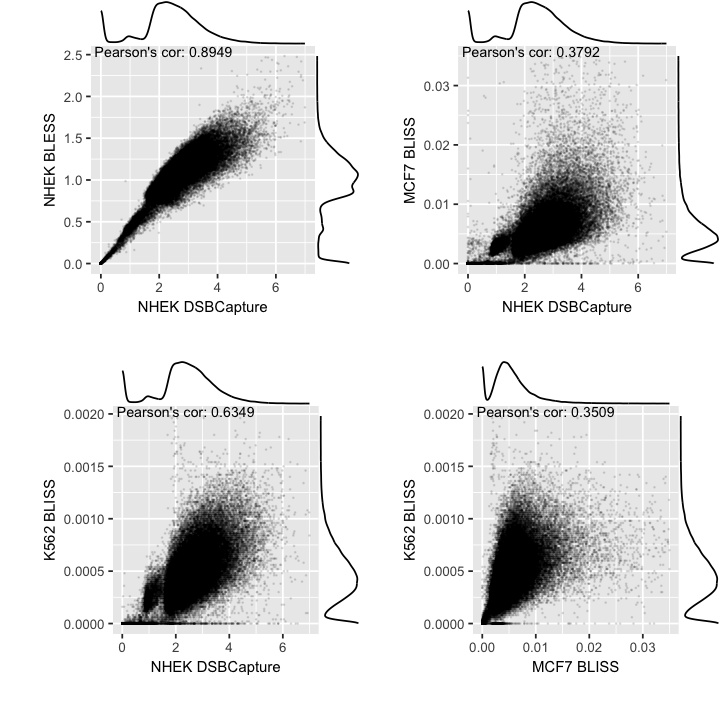

In [10]:
options(repr.plot.width=6, repr.plot.height=6)
pf <- grid.arrange(p1, p2, p3, p4, ncol=2)
ggsave("SupFigure1_compare_dsb_scatters.png", plot=pf, path=supfigdir, width=6, height=6, units="in", dpi=600)

# Correlation between features and NHEK DSBCapture values

In [11]:
my_scatter_plot <- function(x, y, myxlim=NULL, myylim=NULL, quantile=FALSE, myxlab="x values", myylab="y values"){
    df <- data.frame(x=x, y=y)
    #df <- data.frame(x=x, y=y, d=densCols(x,y))
    if (quantile){
        myylim=quantile(df$y, c(0.01, .99))
        myxlim=quantile(df$x, c(0.01, .99))
    }
    p=cor.test(df$x, df$y, method="pearson")
    if (round(p$p.value, digits=4) == 0){
        mytext=paste("Pearsons: ", round(p$estimate, digits=4), sep="")
    } else {
        mytext=paste("Pearsons: ", round(p$estimate, digits=4), "\n p-value: ", round(p$p.value, digits=4), sep="")}
    # ggMarginal is being weird with using scale_x_continuous, so need to filter the data with the x and y limits 
    myi = df$x<=myxlim[2] & df$x >= myxlim[1] & df$y <= myylim[2] & df$y >= myylim[1]
    p1 <- ggplot(df[myi,], aes(x,y)) + geom_point(size=.1, alpha=0.1) + 
        xlab(paste0(myxlab, "\n\n")) + ylab(paste0("\n\n", myylab)) +
        annotate("text", x=-Inf, y=Inf, label=mytext, vjust=1.1, hjust=0, size=3) + 
        theme(axis.text=element_text(size=8), text=element_text(size=9), 
              plot.title=element_text(size=1))
        #stat_density2d(aes(fill=..level..), geom="polygon")+ scale_fill_gradient(low="blue", high="orange")
    pf <- ggExtra::ggMarginal(p1, type="density", size=5, margin="both")
    return(pf)
}


In [12]:
dat <- read.table("data/input_data/GSM2068755_BREAK_n1.scores.txt", header=T)
datf <- read.table("data/input_data/NHEK_features.tab", header=T)

In [13]:
datb <- dat[,5]
datf <- datf[,5:ncol(datf)]
fnames <- fixlabels(colnames(datf))

In [14]:
fnames

[1] "CTCF"            "H3K9me3"         "H3K27ac"         "H3K27me3"       
 [5] "H3K36me3"        "H3K4me3"         "Pol2b"           "OpenChromDnase" 
 [9] "RNA-Seq"         "Replication Seq" "G-quadruplex"

In [15]:
myplots=c()
for (i in c(1:ncol(datf))){
    p <- my_scatter_plot(x=datb, y=datf[,i], myxlim=c(0,7), myylim=quantile(datf[,i], c(0.01, .99)), 
                         myxlab="NHEK DSBCapture", myylab=fnames[i])
    myplots=c(myplots, list(p))
}


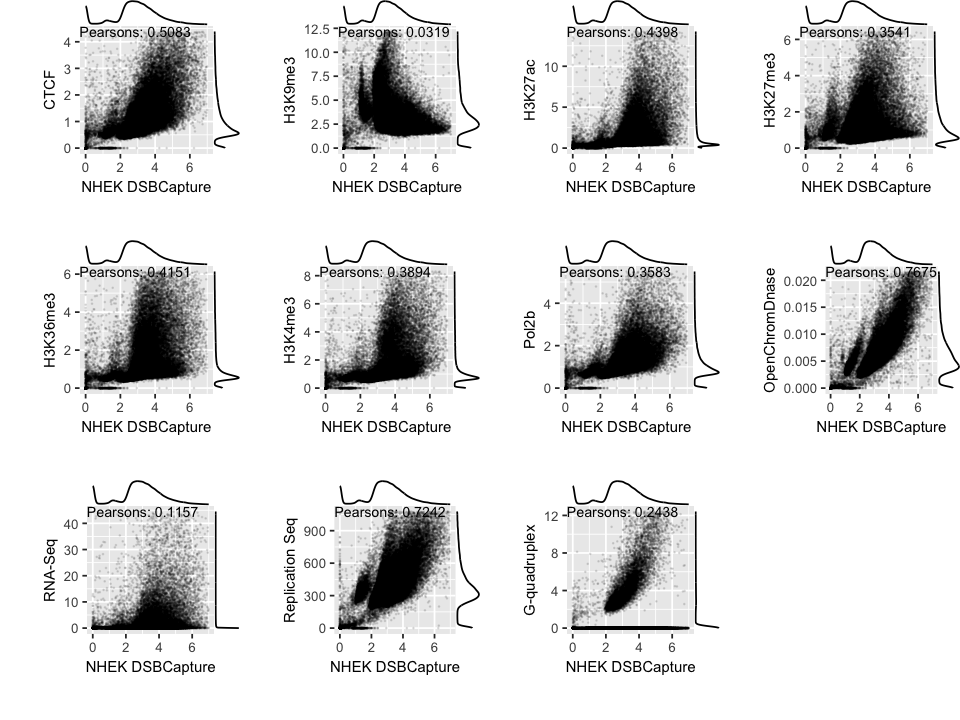

In [17]:
options(repr.plot.width=8, repr.plot.height=6)
gf <- grid.arrange(grobs=myplots, ncol=4)
ggsave("SupFigure3_compare_dsb_feature_scatters.png", plot=gf, path=supfigdir, width=8, height=6, units="in", dpi=600)

In [18]:
my_get_pvalues <- function(x, y, myxlim=NULL, myylim=NULL, quantile=FALSE){
    df <- data.frame(x=x, y=y)
    if (quantile){
        myylim=quantile(df$y, c(0.01, .99))
        myxlim=quantile(df$x, c(0.01, .99))
    }
    p=cor.test(df$x, df$y, method="pearson")
    print(p)
}
myps=c()
for (i in c(1:ncol(datf))){
    p <- my_get_pvalues(x=datb, y=datf[,i], myxlim=c(0,7), myylim=quantile(datf[,i], c(0.01, .99)))
}


	Pearson's product-moment correlation

data:  df$x and df$y
t = 146.85, df = 61901, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5024278 0.5141127
sample estimates:
      cor 
0.5082936 


	Pearson's product-moment correlation

data:  df$x and df$y
t = 7.941, df = 61901, p-value = 2.038e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02402966 0.03976882
sample estimates:
       cor 
0.03190122 


	Pearson's product-moment correlation

data:  df$x and df$y
t = 121.85, df = 61901, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4334658 0.4461731
sample estimates:
      cor 
0.4398415 


	Pearson's product-moment correlation

data:  df$x and df$y
t = 94.201, df = 61901, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3471824 0.3609623
sample estim

# Find hot and cold spots for MCF7 trained with NHEK model 
- compare to original MCF7 hot and cold spots

In [23]:
modelN="data/randforest_results/NHEK_BREAK/all.mod.rdf"
featuresM="data/input_data/MCF7_features.tab"
trueM="data/input_data/MCF7_BLISS_50kb.bedgraph"

In [24]:
mymodel=modelN
myfeatures=featuresM
mytrue=trueM

In [25]:
load(mymodel)
nnames=labels(all.mod$importance)[[1]]
nfix <- fixlabels(nnames)
kfeat <- read.table(myfeatures, header=TRUE)
kfeat <- kfeat[,5:ncol(kfeat)]
knames=fixlabels(names(kfeat))
newnames = nnames[pmatch(knames,nfix)]
names(kfeat) <- newnames

In [26]:
pnew <- predict(all.mod, newdata=kfeat)

In [27]:
ktrue <- read.table(mytrue, header=TRUE)
dato <- cbind(ktrue, pnew)
colnames(dato) <- c(colnames(dato)[1:4], "MCF7_pred_w_NHEK")
write.table(dato, file="data/mcf7_supp_analysis/mcf7_pred_w_nhek.txt", quote=FALSE, sep="\t", row.names=F, col.names=T)

In [28]:
pnk1 <- cor.test(pnew, ktrue[,4])
pnk1


	Pearson's product-moment correlation

data:  pnew and ktrue[, 4]
t = 176.69, df = 61901, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5737485 0.5842220
sample estimates:
      cor 
0.5790091 


In [29]:
# test for significance of overlap for each category (there are 61903 50kb bins in total)
binom.test(595, 741, 662/61903)
binom.test(255, 709, 785/61903)
binom.test(253, 349, 595/61903)
binom.test(2, 18, 2/61903)


	Exact binomial test

data:  595 and 741
number of successes = 595, number of trials = 741, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.01069415
95 percent confidence interval:
 0.7724727 0.8310302
sample estimates:
probability of success 
              0.802969 



	Exact binomial test

data:  255 and 709
number of successes = 255, number of trials = 709, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.01268113
95 percent confidence interval:
 0.3242788 0.3962176
sample estimates:
probability of success 
             0.3596615 



	Exact binomial test

data:  253 and 349
number of successes = 253, number of trials = 349, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.009611812
95 percent confidence interval:
 0.6748665 0.7711270
sample estimates:
probability of success 
             0.7249284 



	Exact binomial test

data:  2 and 18
number of successes = 2, number of trials = 18, p-value = 1.597e-07
alternative hypothesis: true probability of success is not equal to 3.230861e-05
95 percent confidence interval:
 0.01375122 0.34712044
sample estimates:
probability of success 
             0.1111111 


These are the number of regions that we detect as "hot" or "cold" spots using the MCF7 BLISS data predictions and also predictions generated using the NHEK DSBCapture RF model. 

| subset| MCF7 model | NHEK model | both | p-value | 
| :---- | :--------- | :--------- | :--- |
| cancHpredL | 662 | 741 | 595 | < 2.2e-16 |
| cancHpredH | 785 | 709 | 255 | < 2.2e-16 | 
| cancLpredH | 594 | 349 | 253 | < 2.2e-16| 
| cancHpredL2 | 2 | 18 | 2 | 1.597e-07 | 

# Model of DSB with a training and testing set
I created a random forest model of the NHEK DSBCapture data, leaving out 1/3 of the 50kb bins.  Then use the model to predict DSB values for that third. 

In [32]:
modelN="data/supp_analysis/results_Nhek_2o3/all.mod.rdf"
load(modelN)
testfeat <- read.table("data/supp_analysis/results_Nhek_2o3/NHEK_features6_3rd.tab", header=T)
testfeat <- testfeat[,5:ncol(testfeat)]
pnew <- predict(all.mod, newdata=testfeat)
pnew[is.na(pnew)]=0
truedat <- read.table("data/supp_analysis/results_Nhek_2o3/GSM20687556_BREAK_3rd.bedgraph", header=T)

In [33]:
p1 <- my_scatter_plot(x=truedat[,4], y=pnew, myxlim=c(0,7), myylim=c(0,7), 
                      myxlab="NHEK DSBCapture Observed", myylab="NHEK DSBCapture Predicted")

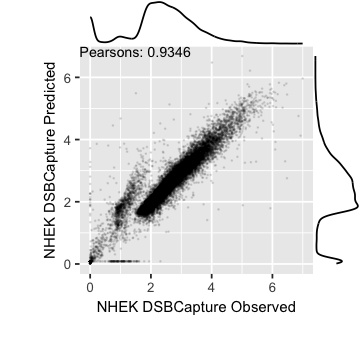

In [35]:
options(repr.plot.width=3, repr.plot.height=3)
grid.arrange(p1)
ggsave("SupFigure5_NHEK_trainingtest.png", plot=p1, path=supfigdir, width=3, height=3, units="in", dpi=600)

# boxplots of SV breaks and DSB scores (alt view of d-scores)

In [36]:
make_into_stars<-function(x){
    s=""
    if (x <= 0.05){s="*"}
    if (x <= 0.01){s="**"}
    if (x <= 0.001){s="***"}
    if (x <= 0.0001){s="****"}
    return(s)
}


In [38]:
ddat <- read.table(paste0("data/dscores/", "nhek.icgc_carc", ".dlogp.txt"), header=T)

In [39]:
ddat[1,]

chr,start,end,breaks,predicted,predlogp,realcnt,log.p,dscore,dlogp
chr1,0,49999,0.628243,0.6005277,-2.976273e-07,1,-0.01245455,0.01245425,-0.7026283


## Plot DSB, broken up by SV counts

In [40]:
xi <- (ddat$realcnt > 0) & (ddat$realcnt <= 10)
mylevls=rle(sort(ddat$realcnt[xi]))$values
df <- data.frame(svbreaks=factor(ddat$realcnt[xi], levels=mylevls), predicted=ddat$predicted[xi])


In [41]:
newlabs=c()
for (i in seq_along(mylevls)){
    pn <- prettyNum(sum(ddat$realcnt[xi]==mylevls[i]), big.mark=",", scientific=TRUE)
    newl = paste0(mylevls[i], "\n(", pn, ")")
    newlabs=c(newlabs, newl)
}

In [42]:
wctests = c(1)
for (i in seq_along(mylevls)) {
    myp <- wilcox.test(ddat$predicted[ddat$realcnt==i], ddat$predicted[ddat$realcnt==i+1], 
                       alternative="two.sided")$p.value
    wctests = c(wctests, myp)
}

In [43]:
pboxa <- ggplot(df, aes(x=svbreaks, y=predicted)) + geom_boxplot(na.rm=TRUE, outlier.shape=NA) + 
    labs(x="SV breaks", y="Predicted DSB") + ylim(0,6) +
    theme(axis.text.x = element_text(angle = 90, hjust=0.5, vjust=0.5, size=9), 
          axis.title=element_text(size=10)) + 
    scale_x_discrete(labels=mylevls) + 
    annotate("text", x=seq(1,(length(wctests))), y=6, label=unlist(lapply(wctests, make_into_stars)), size=3)

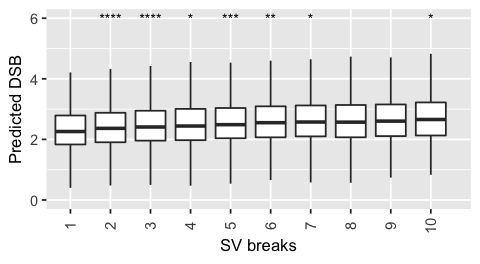

In [44]:
options(repr.plot.width=4, repr.plot.height=2.2)
pboxa

## Plot SVcounts broken up by DSB values

In [45]:
mylevls=seq(0,6, by=0.5)
df <- data.frame(svbreaks=ddat$realcnt, predicted=ddat$predicted)
for (i in seq(1, length(mylevls)-1)){
    xi=(df$predicted >= mylevls[i]) & (df$predicted < mylevls[i+1])
    df$predlevel[xi] <- mylevls[i]
}


In [46]:
df[1,]
rle(sort(df$predlevel))

svbreaks,predicted,predlevel
1,0.6005277,0.5


Run Length Encoding
  lengths: int [1:12] 5459 413 926 11708 14540 12967 8638 4036 1951 823 ...
  values : num [1:12] 0 0.5 1 1.5 2 2.5 3 3.5 4 4.5 ...

In [47]:
wctests = c(1)
for (i in seq(1, length(mylevls)-2)) {
    myp <- wilcox.test(df$svbreaks[df$predlevel==mylevls[i]], 
                       df$svbreaks[df$predlevel==mylevls[i+1]], 
                       alternative="two.sided")$p.value
    wctests = c(wctests, myp)
}

In [48]:
pboxb <- ggplot(df, aes(x=as.factor(predlevel), y=svbreaks)) + geom_boxplot(na.rm=TRUE, outlier.shape=NA) + 
    labs(y="SV breaks", x="Predicted DSB") + ylim(0,25) +
    theme(axis.text.x = element_text(angle = 90, hjust=0.5, vjust=0.5, size=9), 
          axis.title=element_text(size=10)) + 
    scale_x_discrete(labels=mylevls) + 
    annotate("text", x=seq(1,(length(wctests))), y=24, label=unlist(lapply(wctests, make_into_stars)), size=3)

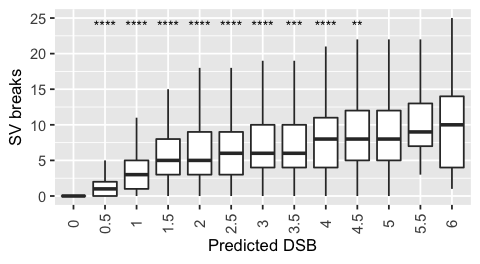

In [49]:
options(repr.plot.width=4, repr.plot.height=2.2)
gf <- grid.arrange(pboxb)

In [51]:
ggsave("SupFigure9_SV_DSB_boxplot.png", plot=pboxb, path=supfigdir, width=4, height=2.2, units="in", dpi=600)